# Bank Churn Prediction

In this project we are going to predict how likely a customer is going to churn using the given data

In [330]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [331]:
bank_base_data = pd.read_csv('./Churn_Modelling.csv')
bank_base_data.shape

(10000, 14)

In [332]:
bank_base_data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [333]:
bank_base_data.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [334]:
bank_base_data.head()
#'Exited' column represents Churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Checking unique values of each column

In [335]:
for col in bank_base_data.columns:
    print("column: {} - Unique Values: {}".format(col, bank_base_data[col].unique()))

column: RowNumber - Unique Values: [    1     2     3 ...  9998  9999 10000]
column: CustomerId - Unique Values: [15634602 15647311 15619304 ... 15584532 15682355 15628319]
column: Surname - Unique Values: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
column: CreditScore - Unique Values: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 71

In [336]:
print("column: {} - Unique Values: {}".format("Geography", bank_base_data.Geography.unique()))
print("column: {} - Unique Values: {}".format("Gender", bank_base_data.Gender.unique()))
print("column: {} - Unique Values: {}".format("Age", bank_base_data.Age.unique()))
print("column: {} - Unique Values: {}".format("Tenure", bank_base_data.Tenure.unique()))
print("column: {} - Unique Values: {}".format("Balance", bank_base_data.Balance.unique()))
print("column: {} - Unique Values: {}".format("NumOfProducts", bank_base_data.NumOfProducts.unique()))

column: Geography - Unique Values: ['France' 'Spain' 'Germany']
column: Gender - Unique Values: ['Female' 'Male']
column: Age - Unique Values: [42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
column: Tenure - Unique Values: [ 2  1  8  7  4  6  3 10  5  9  0]
column: Balance - Unique Values: [     0.    83807.86 159660.8  ...  57369.61  75075.31 130142.79]
column: NumOfProducts - Unique Values: [1 3 2 4]


In [337]:
bank_base_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

All data types are as intended

In [338]:
bank_base_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing data found

In [339]:
bank_base_data["Tenure"].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [340]:
print(bank_base_data['Age'].max())
print(bank_base_data['Age'].min())

92
18


#### Splitting ages into groups for EDA only

In [341]:
bank_age_groups = bank_base_data.copy()

bins = [18,24,30,36,42,48,54,60,66,72,78,84,90,96]

labels = ['18-23','24-29','30-35','36-41','42-47','48-53','54-59','60-65','66-71','72-77','78-83','84-89','90-95']

bank_age_groups['Age_group'] = pd.cut(bank_age_groups['Age'], bins=bins, labels=labels)

In [342]:
bank_age_groups['Age_group'].value_counts()

30-35    2641
36-41    2497
24-29    1511
42-47    1352
48-53     660
18-23     435
54-59     418
60-65     235
66-71     144
72-77      66
78-83      15
84-89       2
90-95       2
Name: Age_group, dtype: int64

In [343]:
bank_age_groups.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Age_group'],
      dtype='object')

Dropping Age column and columns which do not help in predicting churn

In [344]:
bank_age_groups.drop(columns= ['RowNumber','CustomerId','Surname','Age'], axis=1, inplace=True)
bank_age_groups.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_group
0,619,France,Female,2,0.00,1,1,1,101348.88,1,36-41
1,608,Spain,Female,1,83807.86,1,0,1,112542.58,0,36-41
2,502,France,Female,8,159660.80,3,1,0,113931.57,1,36-41
3,699,France,Female,1,0.00,2,0,0,93826.63,0,36-41
4,850,Spain,Female,2,125510.82,1,1,1,79084.10,0,42-47


Some customers churned while still having balance in their accounts. What does this mean?

In [345]:
bank_age_groups.shape

(10000, 11)

In [346]:
bank_base_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


* Tenure, NumOfProducts, HasCrCard, IsActiveMember, and Exited are categorical variables.

* 75% of the customers are of age 44 or below. 

* More than 25% of customers have zero balance. 

* Min EstimatedSalary seems to be a bit odd.

In [347]:
100*bank_base_data['Exited'].value_counts()/len(bank_base_data['Exited'])

0    79.63
1    20.37
Name: Exited, dtype: float64

Dropping unhelpful columns and label encoding categorical variables

In [348]:
bank_data=bank_base_data.copy()

In [349]:
bank_data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [350]:
bank_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [351]:
#from sklearn.preprocessing import LabelEncoder
#geoencode=LabelEncoder()
#bank_data['Geography']=geoencode.fit_transform(bank_data['Geography'])
#bank_data['Gender']=geoencode.fit_transform(bank_data['Gender'])



In [352]:
bank_data.drop(columns= ['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [353]:
#encoded=bank_data.replace({'Geography':{'France':0, 'Germany':1, 'Spain':2}}, {'Gender':{'Female':0, 'Male':1}}, inplace=True)
geomap={'France':0, 'Germany':1, 'Spain':2}
bank_data.Geography=bank_data.Geography.map(geomap)

In [354]:
gendermap={'Female':0, 'Male':1}
bank_data.Gender=bank_data.Gender.map(gendermap)

In [355]:
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [356]:
bank_data.shape

(10000, 11)

In [357]:
bank_data.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [358]:
bank_data['Geography'].value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [359]:
bank_data['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [360]:
bank_data.to_csv('bank_churn_encoded.csv')

# Exploratory Data Analysis

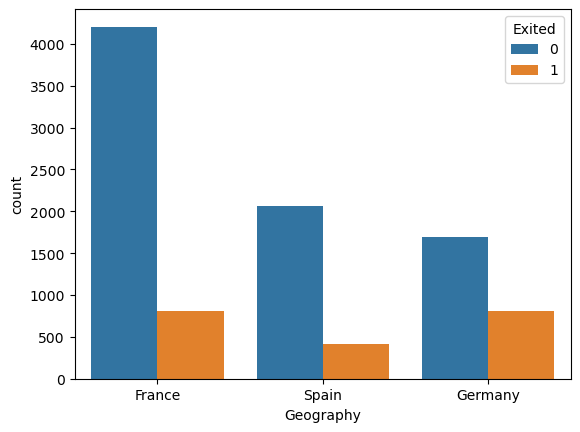

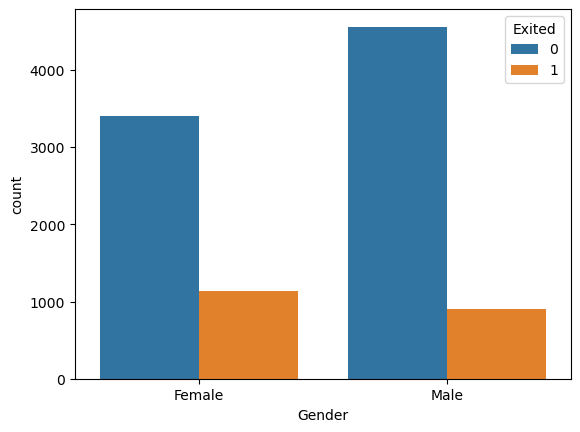

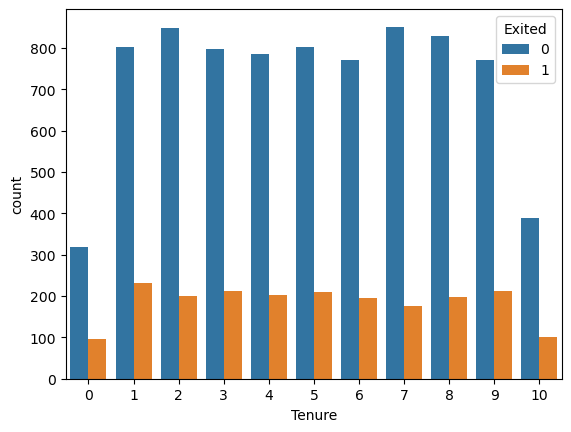

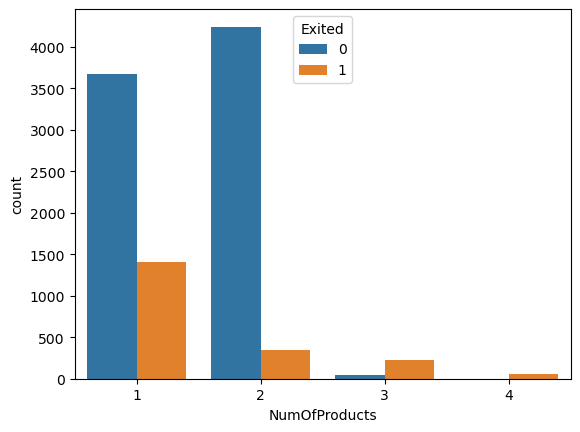

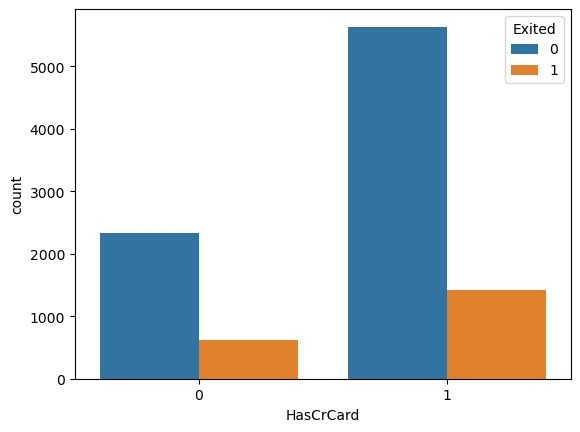

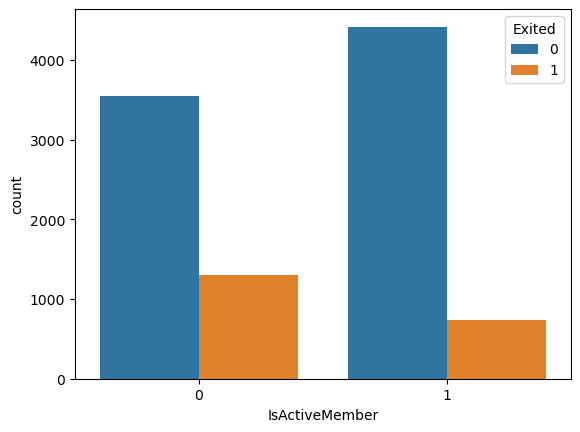

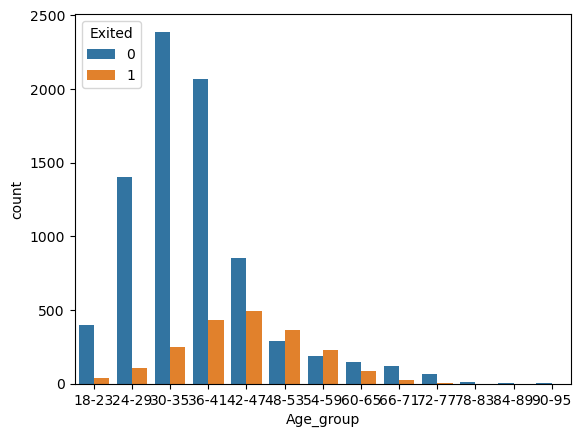

In [361]:
for i, predictor in enumerate(bank_age_groups.drop(columns=['Exited','CreditScore','Balance','EstimatedSalary'])):
    plt.figure(i)
    sns.countplot(data=bank_age_groups, x=predictor, hue='Exited')

* Germany has a bit higher churn ratio than France and Spain
* Females are slightly more likely to churn than Males
* Tenure doesn't seem to significantly affect churn ratio
* Inactive members are more likely to churn
* We can see that Middle Aged customers churn relatively more

# Model Building

In [362]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [363]:
df=bank_data.copy()
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [364]:
x=df.drop('Exited',axis=1)
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [365]:
y=df['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [366]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [367]:
x_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9615,692,2,0,47,3,0.00,2,1,0,150802.41
2339,651,1,1,26,5,147037.32,1,0,0,141763.26
670,624,1,0,48,3,122388.38,2,0,0,30020.09
5195,850,2,1,38,2,94652.04,1,1,1,171960.76
8676,582,0,1,41,1,40488.76,1,1,0,128528.83
...,...,...,...,...,...,...,...,...,...,...
5439,713,1,0,61,4,149525.34,2,1,0,123663.63
2381,614,2,0,41,7,179915.85,1,0,0,14666.35
2310,781,0,1,32,6,147107.91,1,1,1,40066.95
7107,711,1,0,45,1,97486.15,2,1,0,50610.62


In [368]:
y_test

9615    1
2339    0
670     0
5195    0
8676    0
       ..
5439    0
2381    1
2310    0
7107    0
1184    0
Name: Exited, Length: 3000, dtype: int64

#### Logistic Regression

In [369]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression(random_state=0)
model_lr.fit(x_train,y_train)
ylr_pred=model_lr.predict(x_test)
ylr_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [370]:
model_lr.score(x_test,y_test)

0.7923333333333333

In [371]:
y_test

9615    1
2339    0
670     0
5195    0
8676    0
       ..
5439    0
2381    1
2310    0
7107    0
1184    0
Name: Exited, Length: 3000, dtype: int64

In [372]:
ylr_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [373]:
print(classification_report(y_test, ylr_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2392
           1       0.41      0.05      0.09       608

    accuracy                           0.79      3000
   macro avg       0.60      0.52      0.49      3000
weighted avg       0.72      0.79      0.72      3000



Due to the dataset being heavily imbalanced, LogReg predicts 0 most of the times

In [374]:
print(metrics.confusion_matrix(y_test, ylr_pred))

[[2345   47]
 [ 576   32]]


In order to balance the data, we are going to use SMOTEENN (Synthetic Minority Oversampling TEchnique (Works with K-nearest neighbor). ENN=Edited nearest Neighbor)

In [375]:
sm = SMOTEENN()
x_resampled_lr, y_resampled_lr = sm.fit_resample(x,y)

xrlr_train,xrlr_test,yrlr_train,yrlr_test=train_test_split(x_resampled_lr, y_resampled_lr,test_size=0.3)

In [376]:
model_lr_smote=LogisticRegression(random_state=0)
model_lr_smote.fit(xrlr_train,yrlr_train)
yrlr_pred = model_lr_smote.predict(xrlr_test)
yrlr_pred


array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [377]:
x_resampled_lr.shape

(6535, 10)

In [378]:
y_resampled_lr.value_counts()

1    3608
0    2927
Name: Exited, dtype: int64

In [379]:
model_lr_smote.score(xrlr_test, yrlr_test)

0.6955634880163182

In [380]:
print(metrics.classification_report(yrlr_test, yrlr_pred))

              precision    recall  f1-score   support

           0       0.71      0.57      0.64       909
           1       0.68      0.80      0.74      1052

    accuracy                           0.70      1961
   macro avg       0.70      0.69      0.69      1961
weighted avg       0.70      0.70      0.69      1961



In [381]:
print(metrics.confusion_matrix(yrlr_test, yrlr_pred))

[[521 388]
 [209 843]]


After balancing dataset with SMOTE, we get better scores for positive prediction at the cost of scores for negative predictions.
The Logistic Regression model still doesn't have good enough scores, so we go on to use Decision Tree, Random Forest and XGBoost classifiers and see if they perform better

#### Decision Tree Classifier

In [382]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=8, min_samples_leaf=8)

In [383]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=8, random_state=100)

In [384]:
ydt_pred=model_dt.predict(x_test)
ydt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [385]:
model_dt.score(x_test,y_test)

0.8483333333333334

In [386]:
print(classification_report(y_test, ydt_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2392
           1       0.70      0.44      0.54       608

    accuracy                           0.85      3000
   macro avg       0.78      0.70      0.73      3000
weighted avg       0.84      0.85      0.83      3000



Due to the dataset being imbalanced, the '1' category returned poor scores

X

In [387]:
sm = SMOTEENN()
X_resampled_dt, y_resampled_dt = sm.fit_resample(x,y)

In [388]:
X_resampled_dt.shape

(6593, 10)

In [389]:
y_resampled_dt.shape

(6593,)

In [390]:
y_resampled_dt.value_counts()

1    3664
0    2929
Name: Exited, dtype: int64

In [391]:
xrdt_train,xrdt_test,yrdt_train,yrdt_test=train_test_split(X_resampled_dt, y_resampled_dt,test_size=0.3)

In [392]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=8, min_samples_leaf=8)

In [393]:
model_dt_smote.fit(xrdt_train,yrdt_train)
yrdt_pred = model_dt_smote.predict(xrdt_test)


In [394]:
model_dt_smote.score(xrdt_test, yrdt_test)

0.8195146612740142

In [395]:
print(metrics.classification_report(yrdt_test, yrdt_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       885
           1       0.82      0.86      0.84      1093

    accuracy                           0.82      1978
   macro avg       0.82      0.81      0.82      1978
weighted avg       0.82      0.82      0.82      1978



In [396]:
print(metrics.confusion_matrix(yrdt_test, yrdt_pred))

[[683 202]
 [155 938]]


Decision Tree Classifier performed better than Logistic Regression, but we want to see if there are even better performing models

#### Random Forest Classifier

In [397]:
from sklearn.ensemble import RandomForestClassifier

In [398]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=8, min_samples_leaf=8)

model_rf.fit(x_train,y_train)


RandomForestClassifier(max_depth=8, min_samples_leaf=8, random_state=100)

In [399]:
yrf_pred=model_rf.predict(x_test)

In [400]:
model_rf.score(x_test,y_test)

0.8573333333333333

In [401]:
print(classification_report(y_test, yrf_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2392
           1       0.81      0.38      0.52       608

    accuracy                           0.86      3000
   macro avg       0.84      0.68      0.72      3000
weighted avg       0.85      0.86      0.84      3000



In [402]:
sm = SMOTEENN()

X_resampled_rf, y_resampled_rf = sm.fit_resample(x,y)

xrrf_train,xrrf_test,yrrf_train,yrrf_test=train_test_split(X_resampled_rf, y_resampled_rf,test_size=0.3)

In [403]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=8, min_samples_leaf=8)

model_rf_smote.fit(xrrf_train,yrrf_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=8, random_state=100)

In [404]:
yrrf_predict = model_rf_smote.predict(xrrf_test)

In [405]:
model_rf_smote.score(xrrf_test, yrrf_test)

0.8444444444444444

In [406]:
print(metrics.classification_report(yrrf_test, yrrf_predict))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       921
           1       0.84      0.88      0.86      1104

    accuracy                           0.84      2025
   macro avg       0.85      0.84      0.84      2025
weighted avg       0.84      0.84      0.84      2025



Slightly better scores overall compared to Decision Tree Classifier with SMOTE

In [407]:
print(metrics.confusion_matrix(yrrf_test, yrrf_predict))

[[735 186]
 [129 975]]


#### XGBoost Classifier

In [408]:
from xgboost import XGBClassifier

In [409]:
model_xg = XGBClassifier()
model_xg.fit(x_train, y_train)
yxg_pred = model_xg.predict(x_test)

In [410]:
model_xg.score(x_test,y_test)

0.8483333333333334

In [411]:
print(classification_report(y_test, yxg_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2392
           1       0.69      0.46      0.55       608

    accuracy                           0.85      3000
   macro avg       0.78      0.70      0.73      3000
weighted avg       0.84      0.85      0.84      3000



In [412]:
sm = SMOTEENN()

X_resampled_xg, y_resampled_xg = sm.fit_resample(x,y)

xrxg_train,xrxg_test,yrxg_train,yrxg_test=train_test_split(X_resampled_xg, y_resampled_xg,test_size=0.3)

In [413]:
model_xg_smote=XGBClassifier()

model_xg_smote.fit(xrxg_train,yrxg_train)

yrxg_predict = model_xg_smote.predict(xrxg_test)

In [414]:
model_xg_smote.score(xrxg_test, yrxg_test)

0.8688524590163934

In [415]:
print(metrics.classification_report(yrxg_test, yrxg_predict))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       870
           1       0.86      0.91      0.88      1082

    accuracy                           0.87      1952
   macro avg       0.87      0.86      0.87      1952
weighted avg       0.87      0.87      0.87      1952



In [416]:
print(metrics.confusion_matrix(yrxg_test, yrxg_predict))

[[714 156]
 [100 982]]


XGBoost turns out to have the best prediction scores of the above models we have tested

# Sample row predictions

In [417]:
x_sample=x_test.iloc[750:755,:]
x_sample

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2635,592,0,0,27,4,0.00,2,1,1,183569.25
4846,752,0,0,36,7,0.00,2,1,0,184866.86
7833,624,2,1,33,6,66220.17,1,0,1,170819.01
9620,561,2,1,37,4,101470.29,1,0,1,88838.14
8889,580,0,0,39,9,128362.59,1,1,0,86044.98


In [418]:
y_pred_sample=model_xg_smote.predict(x_sample)
y_pred_sample

array([0, 0, 0, 0, 1])

In [422]:
bank_base_data.loc[[2635,4846,7833,9620,8889],:]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2635,2636,15688637,Witt,592,France,Female,27,4,0.00,2,1,1,183569.25,0
4846,4847,15693200,King,752,France,Female,36,7,0.00,2,1,0,184866.86,0
7833,7834,15762455,Yeh,624,Spain,Male,33,6,66220.17,1,0,1,170819.01,0
9620,9621,15620557,Ni,561,Spain,Male,37,4,101470.29,1,0,1,88838.14,0
8889,8890,15777046,Parry,580,France,Female,39,9,128362.59,1,1,0,86044.98,0


In [425]:
xs=x_test.iloc[[1],:]
xs

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2339,651,1,1,26,5,147037.32,1,0,0,141763.26


In [426]:
y_preds=model_xg_smote.predict(xs)
y_preds

array([0])

In [427]:
bank_base_data.loc[[2339],:]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2339,2340,15647975,Vida,651,Germany,Male,26,5,147037.32,1,0,0,141763.26,0


Four out of five sample predictions are correct

# Pickling the model

In [420]:
import pickle
filename = 'churn_model.pkl'
pickle.dump(model_xg_smote, open(filename, 'wb'))
load_model = pickle.load(open(filename, 'rb'))
load_model.predict(x_test)

array([0, 0, 1, ..., 0, 1, 1])

In [421]:
model_score_xg = load_model.score(xrxg_test, yrxg_test)
model_score_xg

0.8688524590163934